
# Física Nuclear y de Partículas #

## Tema 1. Principales características del núcleo atómico.  ##


César Fernández Ramírez\
Departamento de Física Interdisciplinar\
Universidad Nacional de Eduación a Distancia

Versión: Junio 2024

Contenidos:

- Densidad nuclear de Woods-Saxon
- Potencial de Woods-Saxon
- Representación de la energía de ligadura por nucleón de los núcleos en función de $Z$ y $N$
- Energía de ligadura por nucleón en función de $A$ para el núcleo más estable dado un $A$

Se hace uso de las energías de ligaduras de los núcleos recopilados en la base de datos de la Agencia Internacional de la Energía Atómica (IAEA)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cm
import pandas as pd

jpac_blue   = "#1F77B4"; jpac_red    = "#D61D28";
jpac_green  = "#2CA02C"; jpac_orange = "#FF7F0E";
jpac_purple = "#9467BD"; jpac_brown  = "#8C564B";
jpac_pink   = "#E377C2"; jpac_gold   = "#BCBD22";
jpac_aqua   = "#17BECF"; jpac_grey   = "#7F7F7F";

jpac_color = [jpac_blue, jpac_red, jpac_green, 
              jpac_orange, jpac_purple, jpac_brown,
              jpac_pink, jpac_gold, jpac_aqua, jpac_grey, 'black' ];

jpac_axes = jpac_color[10]
dashes = 60*'-'

# the service URL
livechart = "https://nds.iaea.org/relnsd/v1/data?"

# There have been cases in which the service returns an HTTP Error 403: Forbidden
# use this workaround
import urllib.request
def lc_pd_dataframe(url):
    req = urllib.request.Request(url)
    req.add_header('User-Agent', 'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:77.0) Gecko/20100101 Firefox/77.0')
    return pd.read_csv(urllib.request.urlopen(req))

df = lc_pd_dataframe(livechart + "fields=ground_states&nuclides=all")
df = df[pd.to_numeric(df['binding'],errors='coerce').notna()]
df['binding'] /= 1000
df['A'] = df['n']+df['z']

Atomic potential

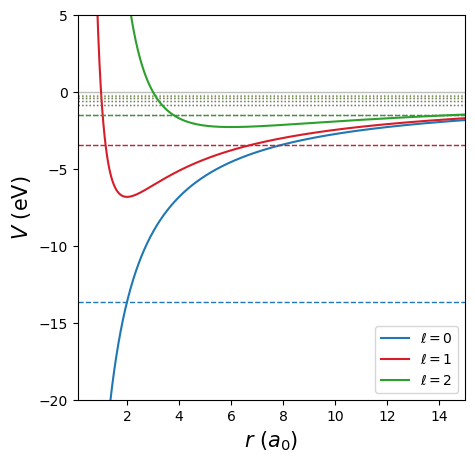

In [2]:
def coulomb(Z,r):
    return -2*Z/r

def barrera(l,r):
    return l*(l+1)/(r*r)

def potencial(Z,l,r):
    return coulomb(Z,r) + barrera(l,r)

def En(ry,nr,l):
    n = nr + l + 1
    return -ry/(n**2)

a0,ry  = 5.291772105, 13.6058
Z, lmax, nmax =1, 2, 5

fig = plt.figure(figsize=(5,5))
rmin, rmax, rstep = 0.1, 15, 0.01
r = np.arange(rmin,rmax,rstep)
plt.xlim((rmin,rmax))
plt.ylim((-20.,5))
plt.ylabel(r'$V$ (eV)',fontsize=15)
plt.xlabel(r'$r$ ($a_0$)',fontsize=15)

plt.hlines(0,rmin,rmax,colors=jpac_color[9], lw=1., linestyles='solid', alpha=0.5)
for l in range(lmax+1):
    texto = '$\ell=$' +  str(l)
    plt.plot(r,potencial(Z,l,r)*ry,'-',c=jpac_color[l],label=texto)
    plt.hlines(En(ry,0,l),rmin,rmax,colors=jpac_color[l], lw=1., linestyles='dashed')
    
    for n in range(1,nmax+1):
        plt.hlines(En(ry,n,l),rmin,rmax,colors=jpac_color[l], lw=1., linestyles='dotted', alpha=0.5)

plt.legend(loc='lower right',ncol=1,frameon=True)
plt.show()
#fig.savefig("hidrogeno.pdf", bbox_inches='tight')

Potencial de Woods-Saxon y densidad nuclear

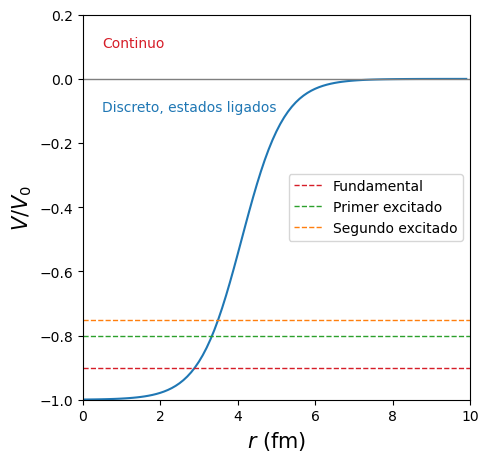

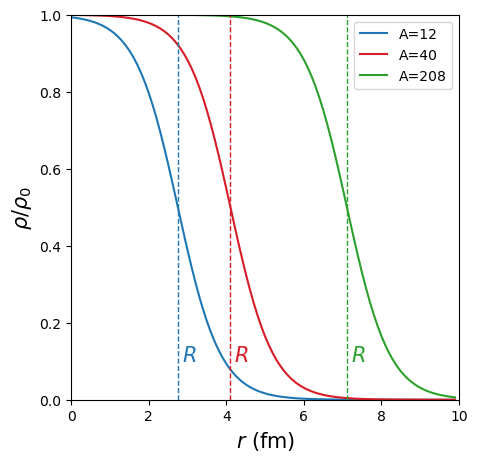

In [3]:
# A: Número de nucleones
# r0: constante, ha de ser 1.22
# a: espesor de la corteza

def radio(r0,A):
    return  r0*(A**(1/3))

def densidadnuclear(r0,A,a,r):
    R = radio(r0,A)
    return 1./(1.+np.exp((r-R)/a))

def WoodsSaxon(r0,A,a,r):
    R = radio(r0,A)
    return -1./(1.+np.exp((r-R)/a))

fig = plt.figure(figsize=(5,5))
r = np.arange(0.,10.,0.1)
plt.ylabel(r'$V/V_0$',fontsize=15)
plt.xlabel(r'$r$ (fm)',fontsize=15)
plt.xlim((0.,10.))
plt.ylim((-1.,0.2))
plt.plot(r,WoodsSaxon(1.2,40,0.55,r),'-',c=jpac_color[0])
plt.hlines(-0.90,0.,10.,colors=jpac_color[1], lw=1., linestyles='dashed',label='Fundamental')
plt.hlines(-0.80,0.,10.,colors=jpac_color[2], lw=1., linestyles='dashed',label='Primer excitado')
plt.hlines(-0.75,0.,10.,colors=jpac_color[3], lw=1., linestyles='dashed',label='Segundo excitado')
plt.hlines(0.,0.,10.,colors=jpac_color[9], lw=1., linestyles='solid')
plt.text(0.5,-0.1,r'Discreto, estados ligados',c=jpac_color[0],fontsize=10)
plt.text(0.5,0.1,r'Continuo',c=jpac_color[1],fontsize=10)
plt.legend(loc='center right',ncol=1,frameon=True)
plt.show()    

fig = plt.figure(figsize=(5,5))
r = np.arange(0.,10.,0.1)
plt.ylabel(r'$\rho/\rho_0$',fontsize=15)
plt.xlabel(r'$r$ (fm)',fontsize=15)
plt.xlim((0.,10.))
plt.ylim((0.,1.))
plt.plot(r,densidadnuclear(1.2,12,0.55,r),'-',c=jpac_color[0],label='A=12')
plt.plot(r,densidadnuclear(1.2,40,0.55,r),'-',c=jpac_color[1],label='A=40')
plt.plot(r,densidadnuclear(1.2,208,0.55,r),'-',c=jpac_color[2],label='A=208')
plt.vlines(radio(1.2,12),0.,1.,colors=jpac_color[0], lw=1., linestyles='dashed')
plt.vlines(radio(1.2,40),0.,1.,colors=jpac_color[1], lw=1., linestyles='dashed')
plt.vlines(radio(1.2,208),0.,1.,colors=jpac_color[2], lw=1., linestyles='dashed')
plt.text(radio(1.2,12)+0.1,0.1,r'$R$',c=jpac_color[0],fontsize=15)
plt.text(radio(1.2,40)+0.1,0.1,r'$R$',c=jpac_color[1],fontsize=15)
plt.text(radio(1.2,208)+0.1,0.1,r'$R$',c=jpac_color[2],fontsize=15)
plt.legend(loc='upper right',ncol=1,frameon=True)
plt.show()    

Representación de la energía de ligadura por nucleón de los núcleos en función de $Z$ y $N$

 
------------------------------------------------------------
IAEA NDS
------------------------------------------------------------
Número de núcleos en la base de datos: 3357
Par-Par:      847
Par-Impar:    855
Impar-Par:    818
Impar-Impar:  837
Comprobación. Total núcleos: 3357
 
------------------------------------------------------------
Número de núcleos estables en la base de datos: 244
Par-Par:      140
Par-Impar:    52
Impar-Par:    48
Impar-Impar:  4
Comprobación. Total núcleos estables: 244


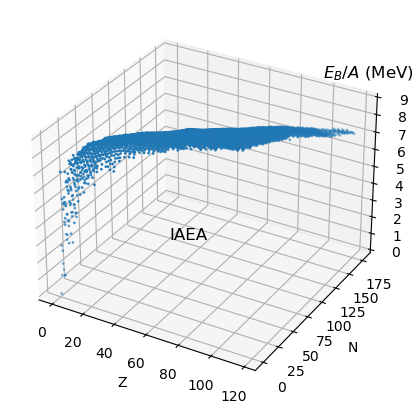

In [4]:
dfparpar = df.loc[ ((df['z']%2==0) & (df['n']%2==0))]
dfimparimpar = df.loc[ ((df['z']%2!=0) & (df['n']%2!=0))]
dfparimpar = df.loc[ ((df['z']%2==0) & (df['n']%2!=0))]
dfimparpar = df.loc[ ((df['z']%2!=0) & (df['n']%2==0))]

print(' '); print(dashes); print('IAEA NDS'); print(dashes);
print('Número de núcleos en la base de datos:',df['n'].count())
print('Par-Par:     ', dfparpar['z'].count())
print('Par-Impar:   ', dfparimpar['z'].count())
print('Impar-Par:   ', dfimparpar['z'].count())
print('Impar-Impar: ', dfimparimpar['z'].count())
total = dfparpar['z'].count()+ dfimparimpar['z'].count() +dfparimpar['z'].count()+dfimparpar['z'].count() 
print('Comprobación. Total núcleos:', total )

df_es = df.loc[(df['half_life']=='STABLE' )]
dfparpar_es = df_es.loc[ ((df_es['z']%2==0) & (df_es['n']%2==0))]
dfimparimpar_es = df_es.loc[ ((df_es['z']%2!=0) & (df_es['n']%2!=0))]
dfparimpar_es = df_es.loc[ ((df_es['z']%2==0) & (df_es['n']%2!=0))]
dfimparpar_es = df_es.loc[ ((df_es['z']%2!=0) & (df_es['n']%2==0))]

print(' '); print(dashes)
print('Número de núcleos estables en la base de datos:',df_es['n'].count())
print('Par-Par:     ', dfparpar_es['z'].count())
print('Par-Impar:   ', dfparimpar_es['z'].count())
print('Impar-Par:   ', dfimparpar_es['z'].count())
print('Impar-Impar: ', dfimparimpar_es['z'].count())
total_es = dfparpar_es['z'].count()+ dfimparimpar_es['z'].count() +dfparimpar_es['z'].count()+dfimparpar_es['z'].count() 
print('Comprobación. Total núcleos estables:', total_es )

fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(projection='3d')
ax.set_zlim((0.,9.))
ax.set_xlabel('Z')
ax.set_ylabel('N')
ax.set_zlabel(r'$E_B/A$ (MeV)')
ax.text(110,140,11,r'$E_B/A$ (MeV)',c=jpac_color[10],fontsize=12)
ax.text(50,50,3,'IAEA',c=jpac_color[10],fontsize=12)
ax.scatter(df['z'],df['n'],df['binding'],marker='o',s=1,c=jpac_color[0])
plt.show()
#fig.savefig('BindingEnergy3DIAEA.pdf', bbox_inches='tight')   

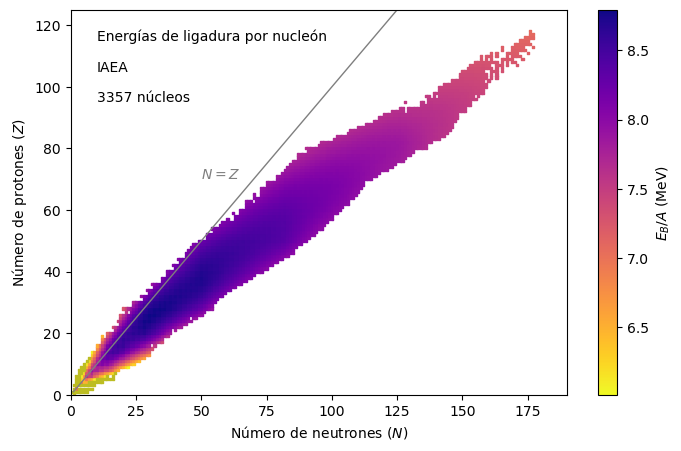

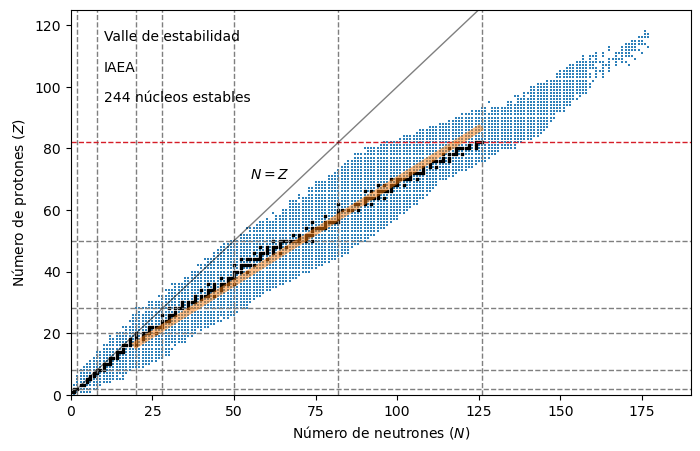

In [5]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,5)) 
ax.set_xlabel(r'Número de neutrones ($N$)')
ax.set_ylabel(r'Número de protones ($Z$)')
df1 = df.loc[(df['binding'] >= 6)]
df2 = df.loc[(df['binding'] < 6)]
ax.set_xlim((0,190))
ax.set_ylim((0,125))
x = np.linspace(1,125,125)
ax.plot(x,x,'-',lw=1,color=jpac_color[9])
ax.text(10,115,r'Energías de ligadura por nucleón',c=jpac_color[10],fontsize=10)
ax.text(10,105,r'IAEA',c=jpac_color[10],fontsize=10)
texto = str(df['n'].count()) + ' núcleos'
ax.text(10,95,texto,c=jpac_color[10],fontsize=10)
ax.text(50,70,r'$N=Z$',c=jpac_color[9],fontsize=10)
pa = ax.scatter(df1['n'],df1['z'],marker='s',s=2.5, c=df1['binding'], cmap='plasma_r')
fig.colorbar(pa,ax=ax,orientation='vertical',label=r'$E_B/A$ (MeV)')
ax.scatter(df2['n'],df2['z'],marker='s',s=2.5, c=jpac_color[7])
plt.show() 
#fig.savefig('CartaNuclearIAEA.pdf', bbox_inches='tight')   

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,5)) 
ax.set_xlabel(r'Número de neutrones ($N$)')
ax.set_ylabel(r'Número de protones ($Z$)')
ax.set_xlim((0,190))
ax.set_ylim((0,125))
plt.hlines( [2,8,20,28,50,126], 0, 190,colors=jpac_color[9], lw=1., linestyles='dashed')
plt.vlines( [2,8,20,28,50,82,126], 0, 125,colors=jpac_color[9], lw=1., linestyles='dashed')
plt.hlines( 82, 0, 190,colors=jpac_color[1], lw=1., linestyles='dashed')
ax.plot(x,x,'-',lw=1,color=jpac_color[10],alpha=0.5)
y = np.linspace(20,125,100)
ax.plot(y,3+y/1.5,'-',lw=5,color=jpac_color[3],alpha=0.5)
ax.text(10,115,r'Valle de estabilidad',c=jpac_color[10],fontsize=10)
ax.text(10,105,r'IAEA',c=jpac_color[10],fontsize=10)
texto = str(df_es['n'].count()) + ' núcleos estables'
ax.text(10,95,texto,c=jpac_color[10],fontsize=10)
ax.text(55,70,r'$N=Z$',c=jpac_color[10],fontsize=10)
ax.scatter(df['n'],df['z'],marker='s',s=2, c=jpac_color[0],edgecolors='white',lw=0.05)
ax.scatter(df_es['n'],df_es['z'],marker='s',s=2, c=jpac_color[10])
plt.show() 
#fig.savefig('ValleEstabilidadIAEA.pdf', bbox_inches='tight') 

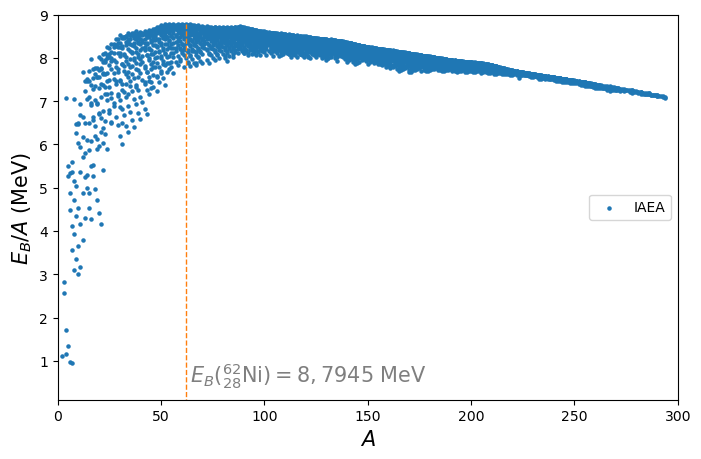

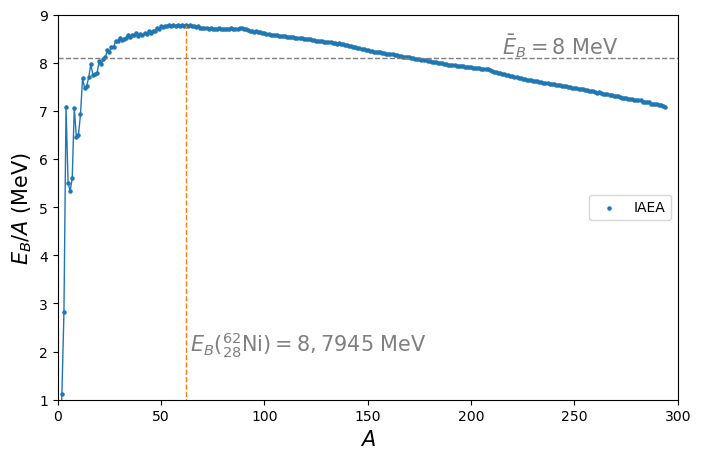

In [6]:
gdf = df.groupby('A')
maxavEbinda = gdf.apply(lambda t: t[t.binding==t.binding.max()])

fig = plt.figure(figsize=(8,5))
plt.ylabel(r'$E_B/A$ (MeV)',fontsize=15)
plt.xlabel(r'$A$',fontsize=15)
plt.ylim((0.1,9))
plt.xlim((0,300))
plt.vlines(62,0,df['binding'].max(),colors=jpac_color[3], lw=1., linestyles='dashed')
plt.scatter(df['A'], df['binding'],marker='o',s=5,c=jpac_color[0],label='IAEA')
plt.text(64,0.5,r'$E_B(^{62}_{28}$Ni$)=8,7945$ MeV',c=jpac_color[9],fontsize=15)
plt.legend(loc='center right',ncol=1,frameon=True)
plt.show()  
#fig.savefig('BEIAEA.pdf', bbox_inches='tight')   

fig = plt.figure(figsize=(8,5))
plt.ylabel(r'$E_B/A$ (MeV)',fontsize=15)
plt.xlabel(r'$A$',fontsize=15)
plt.ylim((1,9))
plt.xlim((0,300))
plt.hlines(8.09670568181818,0.,300.,colors=jpac_color[9], lw=1., linestyles='dashed')
plt.vlines(62,0,maxavEbinda['binding'].max(),colors=jpac_color[3], lw=1., linestyles='dashed')
plt.scatter(maxavEbinda['A'], maxavEbinda['binding'],marker='o',s=5,c=jpac_color[0],label='IAEA')
plt.plot(maxavEbinda['A'], maxavEbinda['binding'],'-',lw=1,c=jpac_color[0])
plt.text(215,8.2,r'$\bar{E}_B=8$ MeV',c=jpac_color[9],fontsize=15)
plt.text(64,2,r'$E_B(^{62}_{28}$Ni$)=8,7945$ MeV',c=jpac_color[9],fontsize=15)
plt.legend(loc='center right',ncol=1,frameon=True)
plt.show()  

Energía de separación

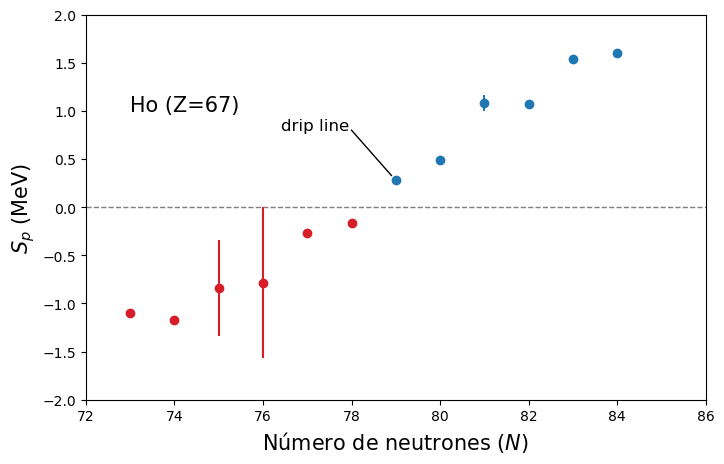

In [20]:
dfHo = df.query('symbol=="Ho"')
dfHoAp = dfHo.dropna(subset=['sp', 'unc_sp'])
df1 = dfHoAp.loc[(dfHoAp['sp'] >= 0)]
df2 = dfHoAp.loc[(dfHoAp['sp'] < 0)]

fig = plt.figure(figsize=(8,5))
plt.xlabel(r'Número de neutrones ($N$)',fontsize=15)
plt.ylabel(r'$S_p$ (MeV)',fontsize=15)
plt.ylim((-2,2))
plt.xlim((72,86))
plt.hlines(0,72.,86.,colors=jpac_color[9], lw=1., linestyles='dashed')
plt.errorbar(df1['n'], df1['sp']/1000,yerr=df1['unc_sp']/1000,fmt='o',c=jpac_color[0])
plt.errorbar(df2['n'], df2['sp']/1000,yerr=df2['unc_sp']/1000,fmt='o',c=jpac_color[1])
plt.text(73,1,'Ho (Z=67)',c=jpac_color[10],fontsize=15)
plt.plot([78,78.9],[0.8,0.33],'-',lw=1,c=jpac_color[10])
plt.text(76.4,0.8,'drip line',c=jpac_color[10],fontsize=12)
plt.show()  
#fig.savefig('driplinePHo.pdf', bbox_inches='tight') 

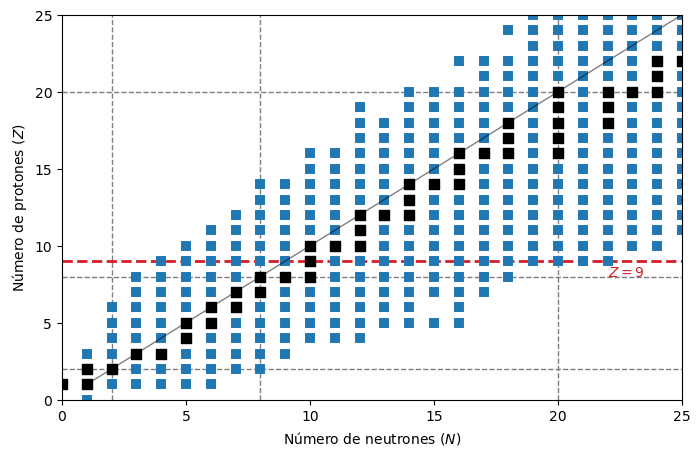

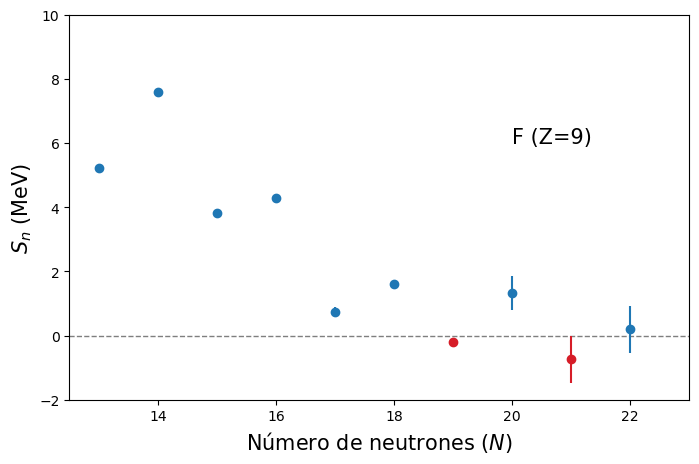

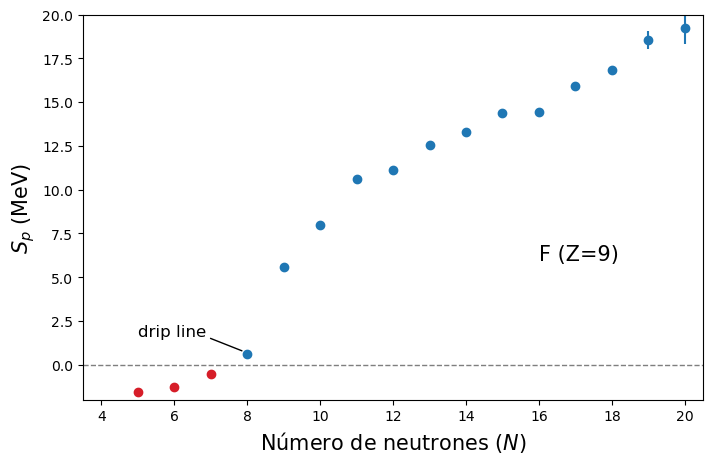

In [8]:
dfF = df.query('z==9')
dfFAp = dfF.dropna(subset=['sp', 'unc_sp'])
dfFAn = dfF.dropna(subset=['sn', 'unc_sn'])

df1 = dfFAp.loc[(dfFAp['sp'] >= 0)]
df2 = dfFAp.loc[(dfFAp['sp'] < 0)]

df3 = dfFAn.loc[(dfFAn['sn'] >= 0)]
df4 = dfFAn.loc[(dfFAn['sn'] < 0)]

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,5)) 
ax.set_xlabel(r'Número de neutrones ($N$)')
ax.set_ylabel(r'Número de protones ($Z$)')
ax.set_xlim((0,25))
ax.set_ylim((0,25))
plt.hlines( [2,8,20,28,50,126], 0, 190,colors=jpac_color[9], lw=1., linestyles='dashed',zorder=0)
plt.vlines( [2,8,20,28,50,82,126], 0, 125,colors=jpac_color[9], lw=1., linestyles='dashed',zorder=0)
plt.hlines( 9, 0, 25,colors=jpac_color[1], lw=2, linestyles='dashed',zorder=0)
ax.plot(x,x,'-',lw=1,color=jpac_color[10],alpha=0.5)
y = np.linspace(20,125,100)
ax.text(22,8,r'$Z=9$',c=jpac_color[1],fontsize=10)
ax.scatter(df['n'],df['z'],marker='s',s=50, c=jpac_color[0],edgecolors='white',lw=0.05)
ax.scatter(df_es['n'],df_es['z'],marker='s',s=50, c=jpac_color[10],zorder=1)
plt.show() 
#fig.savefig('ValleEstabilidadIAEA_ZOOM.pdf', bbox_inches='tight') 

fig = plt.figure(figsize=(8,5))
plt.xlabel(r'Número de neutrones ($N$)',fontsize=15)
plt.ylabel(r'$S_n$ (MeV)',fontsize=15)
plt.ylim((-2,10))
plt.xlim((12.5,23))
plt.hlines(0,12.5,23.,colors=jpac_color[9], lw=1., linestyles='dashed')
plt.errorbar(df3['n'], df3['sn']/1000,yerr=df3['unc_sn']/1000,fmt='o',c=jpac_color[0])
plt.errorbar(df4['n'], df4['sn']/1000,yerr=df4['unc_sn']/1000,fmt='o',c=jpac_color[1])
plt.text(20,6,'F (Z=9)',c=jpac_color[10],fontsize=15)
plt.show()  
#fig.savefig('driplineN.pdf', bbox_inches='tight') 

fig = plt.figure(figsize=(8,5))
plt.xlabel(r'Número de neutrones ($N$)',fontsize=15)
plt.ylabel(r'$S_p$ (MeV)',fontsize=15)
plt.ylim((-2,20))
plt.xlim((3.5,20.5))
plt.hlines(0,3.5,20.5,colors=jpac_color[9], lw=1., linestyles='dashed')
plt.errorbar(df1['n'], df1['sp']/1000,yerr=df1['unc_sp']/1000,fmt='o',c=jpac_color[0])
plt.errorbar(df2['n'], df2['sp']/1000,yerr=df2['unc_sp']/1000,fmt='o',c=jpac_color[1])
plt.plot([7,7.85],[1.5,0.8],'-',lw=1,c=jpac_color[10])
plt.text(5,1.6,'drip line',c=jpac_color[10],fontsize=12)
plt.text(16,6,'F (Z=9)',c=jpac_color[10],fontsize=15)
plt.show()  
#fig.savefig('driplineP.pdf', bbox_inches='tight') 

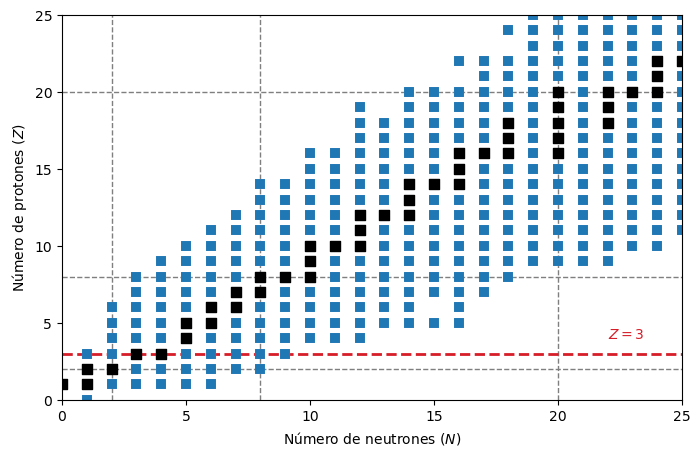

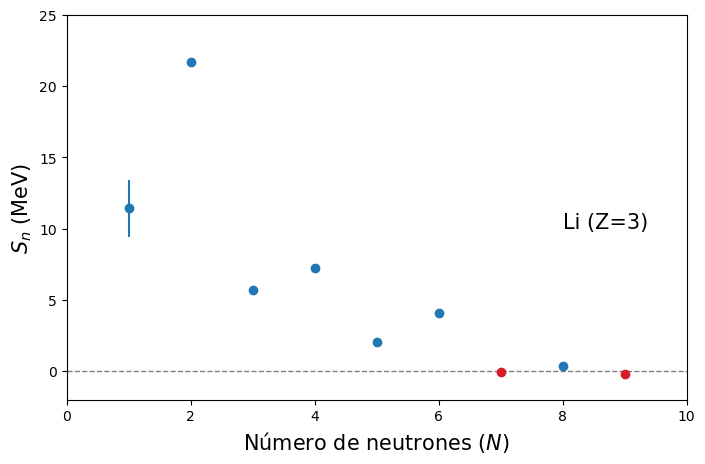

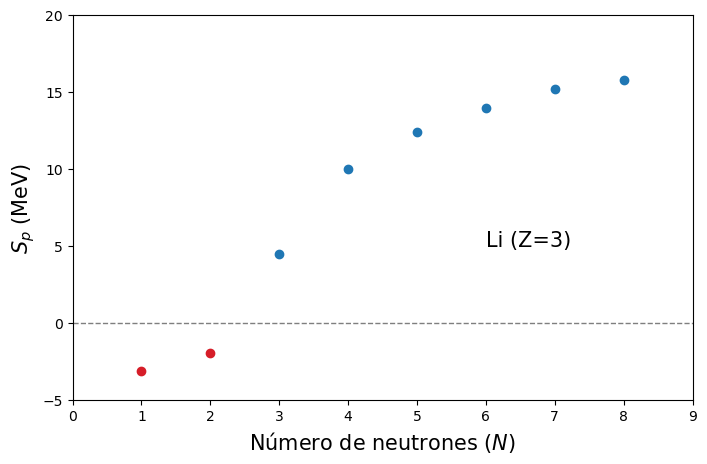

In [22]:
dfF = df.query('z==3')
dfFAp = dfF.dropna(subset=['sp', 'unc_sp'])
dfFAn = dfF.dropna(subset=['sn', 'unc_sn'])

df1 = dfFAp.loc[(dfFAp['sp'] >= 0)]
df2 = dfFAp.loc[(dfFAp['sp'] < 0)]

df3 = dfFAn.loc[(dfFAn['sn'] >= 0)]
df4 = dfFAn.loc[(dfFAn['sn'] < 0)]

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,5)) 
ax.set_xlabel(r'Número de neutrones ($N$)')
ax.set_ylabel(r'Número de protones ($Z$)')
ax.set_xlim((0,25))
ax.set_ylim((0,25))
plt.hlines( [2,8,20,28,50,126], 0, 190,colors=jpac_color[9], lw=1., linestyles='dashed',zorder=0)
plt.vlines( [2,8,20,28,50,82,126], 0, 125,colors=jpac_color[9], lw=1., linestyles='dashed',zorder=0)
plt.hlines( 3, 0, 25,colors=jpac_color[1], lw=2, linestyles='dashed',zorder=0)
ax.text(22,4,r'$Z=3$',c=jpac_color[1],fontsize=10)
ax.scatter(df['n'],df['z'],marker='s',s=50, c=jpac_color[0],edgecolors='white',lw=0.05)
ax.scatter(df_es['n'],df_es['z'],marker='s',s=50, c=jpac_color[10],zorder=1)
plt.show() 
#fig.savefig('ValleEstabilidadIAEA_ZOOM_Li.pdf', bbox_inches='tight') 

fig = plt.figure(figsize=(8,5))
plt.xlabel(r'Número de neutrones ($N$)',fontsize=15)
plt.ylabel(r'$S_n$ (MeV)',fontsize=15)
plt.ylim((-2,25))
plt.xlim((0,10))
plt.hlines(0,0,10,colors=jpac_color[9], lw=1., linestyles='dashed')
plt.errorbar(df3['n'], df3['sn']/1000,yerr=df3['unc_sn']/1000,fmt='o',c=jpac_color[0])
plt.errorbar(df4['n'], df4['sn']/1000,yerr=df4['unc_sn']/1000,fmt='o',c=jpac_color[1])
plt.text(8,10,'Li (Z=3)',c=jpac_color[10],fontsize=15)
plt.show()  
#fig.savefig('driplineN_Li.pdf', bbox_inches='tight') 

fig = plt.figure(figsize=(8,5))
plt.xlabel(r'Número de neutrones ($N$)',fontsize=15)
plt.ylabel(r'$S_p$ (MeV)',fontsize=15)
plt.ylim((-5,20))
plt.xlim((0,9))
plt.hlines(0,0,9,colors=jpac_color[9], lw=1., linestyles='dashed')
plt.errorbar(df1['n'], df1['sp']/1000,yerr=df1['unc_sp']/1000,fmt='o',c=jpac_color[0])
plt.errorbar(df2['n'], df2['sp']/1000,yerr=df2['unc_sp']/1000,fmt='o',c=jpac_color[1])
plt.text(6,5,'Li (Z=3)',c=jpac_color[10],fontsize=15)
plt.show()  
#fig.savefig('driplineP_Li.pdf', bbox_inches='tight') 

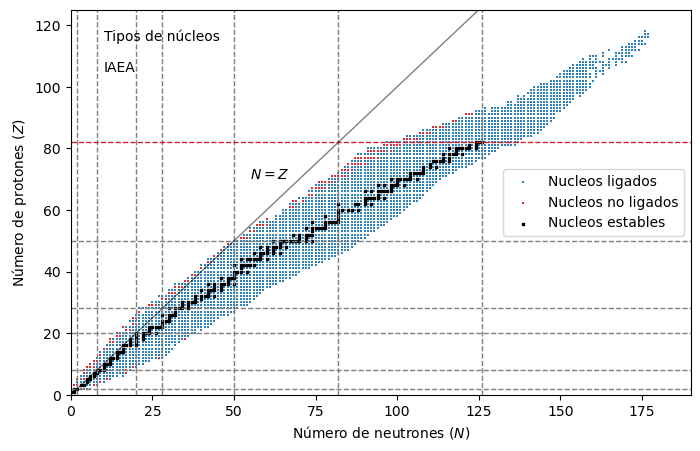

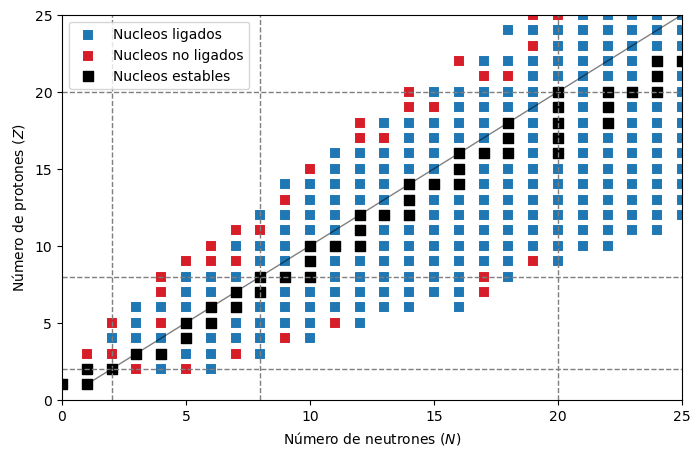

In [10]:
df_es = df.loc[(df['half_life']=='STABLE')]
df_nes = df.loc[(df['half_life']!='STABLE' )]
df_na = df_nes.dropna(subset=['sp', 'sn'])
dfb = df_na.loc[((df['sn'] >= 0) & (df['sp'] >= 0))]
dfu = df_na.loc[((df['sn'] < 0) | (df['sp'] < 0))]

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,5)) 
ax.set_xlabel(r'Número de neutrones ($N$)')
ax.set_ylabel(r'Número de protones ($Z$)')
ax.set_xlim((0,190))
ax.set_ylim((0,125))
plt.hlines( [2,8,20,28,50,126], 0, 190,colors=jpac_color[9], lw=1., linestyles='dashed')
plt.vlines( [2,8,20,28,50,82,126], 0, 125,colors=jpac_color[9], lw=1., linestyles='dashed')
plt.hlines( 82, 0, 190,colors=jpac_color[1], lw=1., linestyles='dashed')
ax.plot(x,x,'-',lw=1,color=jpac_color[10],alpha=0.5)
ax.text(10,115,r'Tipos de núcleos',c=jpac_color[10],fontsize=10)
ax.text(10,105,r'IAEA',c=jpac_color[10],fontsize=10)
ax.text(55,70,r'$N=Z$',c=jpac_color[10],fontsize=10)
ax.scatter(dfb['n'],dfb['z'],marker='s',s=2, c=jpac_color[0],edgecolors='white',lw=0.05,label='Nucleos ligados')
ax.scatter(dfu['n'],dfu['z'],marker='s',s=2, c=jpac_color[1],edgecolors='white',lw=0.05,label='Nucleos no ligados')
ax.scatter(df_es['n'],df_es['z'],marker='s',s=2, c=jpac_color[10],label='Nucleos estables')
plt.legend(loc='center right',ncol=1,frameon=True)
plt.show() 
#fig.savefig('TiposdeNucleos.pdf', bbox_inches='tight') 

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,5)) 
ax.set_xlabel(r'Número de neutrones ($N$)')
ax.set_ylabel(r'Número de protones ($Z$)')
ax.set_xlim((0,25))
ax.set_ylim((0,25))
plt.hlines( [2,8,20,28,50,126], 0, 190,colors=jpac_color[9], lw=1., linestyles='dashed')
plt.vlines( [2,8,20,28,50,82,126], 0, 125,colors=jpac_color[9], lw=1., linestyles='dashed')
plt.hlines( 82, 0, 190,colors=jpac_color[1], lw=1., linestyles='dashed')
ax.plot(x,x,'-',lw=1,color=jpac_color[10],alpha=0.5)
ax.scatter(dfb['n'],dfb['z'],marker='s',s=50, c=jpac_color[0],edgecolors='white',lw=0.05,label='Nucleos ligados')
ax.scatter(dfu['n'],dfu['z'],marker='s',s=50, c=jpac_color[1],edgecolors='white',lw=0.05,label='Nucleos no ligados')
ax.scatter(df_es['n'],df_es['z'],marker='s',s=50, c=jpac_color[10],label='Nucleos estables')
plt.legend(loc='upper left',ncol=1,frameon=True)
plt.show() 
#fig.savefig('TiposdeNucleosZOOM.pdf', bbox_inches='tight') 
